In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rcParams['figure.dpi'] = 150

import numpy as np

import sys
sys.path.append("..")
from encoder_learning_benchmarks import optimizers, common, datasets, networks, rules, benchmark, utils

In [17]:
rng = np.random.RandomState(48911)
n_dim_hidden = 100

opt = optimizers.adam.manifest.ctor()
#opt = optimizers.sgd.manifest.ctor(eta=1e-2)

dset = datasets.multiplication.manifest.ctor(biased=False, skewed=False, rng=rng)
#dset = datasets.gaussian_clusters.manifest.ctor(rng=rng, biased=True)
#dset = datasets.mnist.manifest.ctor(rng=rng)

#net = networks.perceptron.manifest.ctor(dset.n_dim_in, n_dim_hidden, initialisation="normal", rng=rng)
net = networks.rbf.manifest.ctor(dset.n_dim_in, n_dim_hidden, rng=rng, learn_covariance=True)

dec_rule = rules.pes.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)
#dec_rule = rules.lstsq.manifest.ctor(n_dim_hidden, dset.n_dim_out, rng=rng)

enc_rule = rules.backprop.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
#enc_rule = rules.feedback_alignment.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng)
#enc_rule = rules.voja.manifest.ctor(dset.n_dim_in, n_dim_hidden, dset.n_dim_out, rng=rng, kappa=1e-4)
#enc_rule = None

In [18]:
res = benchmark.run_single_trial(opt, dset, net, dec_rule, enc_rule, n_epochs=200, batch_size=100, compute_test_error=True, rng=rng, sequential=False)

  200/200 (err_training=0.0028, err_validation=0.0028)


Text(0.5, 0, 'Training Epoch')

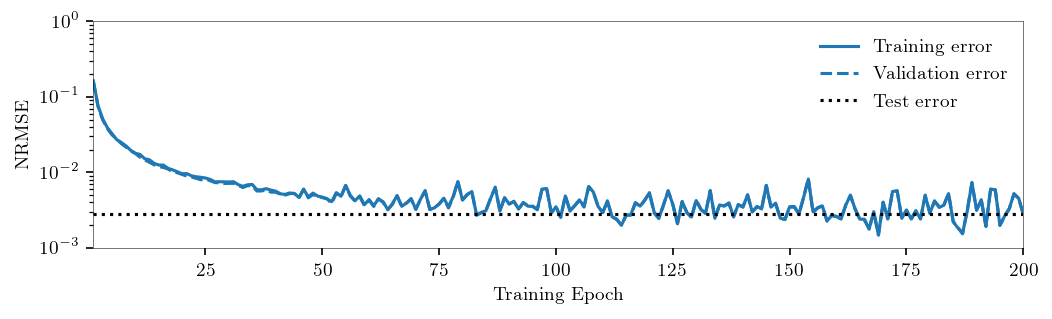

In [19]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.semilogy(res["epochs"], res["errs_training"], label="Training error")
ax.set_prop_cycle(None)
ax.semilogy(res["epochs"], res["errs_validation"], label="Validation error", linestyle='--')
if not res["err_test"] is None:
    ax.axhline(res["err_test"], label="Test error", linestyle=":", color="k")
ax.legend()
ax.set_xlim(1, res["n_epochs"])
ax.set_ylim(1e-3, 1)
ax.set_ylabel("Error rate" if dset.is_classification_dataset else "NRMSE")
ax.set_xlabel("Training Epoch")

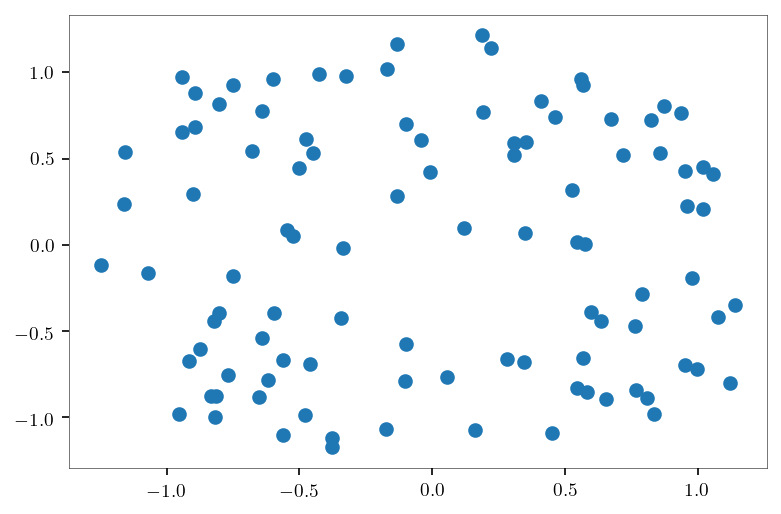

In [21]:
fig, ax = plt.subplots()
if ("mus" in net.params) and ("thetas" in net.params):
    ax.scatter(net.params["mus"][:, 0], net.params["mus"][:, 1])

In [29]:
networks.rbf.manifest.ctor.__name__

'RBF'